In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron


In [75]:
df = pd.read_csv("../datasets/telecom_churn_data.csv")

In [76]:
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [77]:
df.shape

(99999, 226)

In [78]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [79]:
#To increase the display width of the data (i.e. #columns,rows)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [80]:
df.describe(include=[np.number])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [81]:
# Seperating the date, ID and numerical columns
df_date=['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']
df_id = ["mobile_number","circle_id"]
df_num = [col for col in df.columns if col not in df_date + df_id]

In [82]:
# Features with percentage of Null Value 

round(df.isnull().sum()/len(df.index),2)*100



mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t

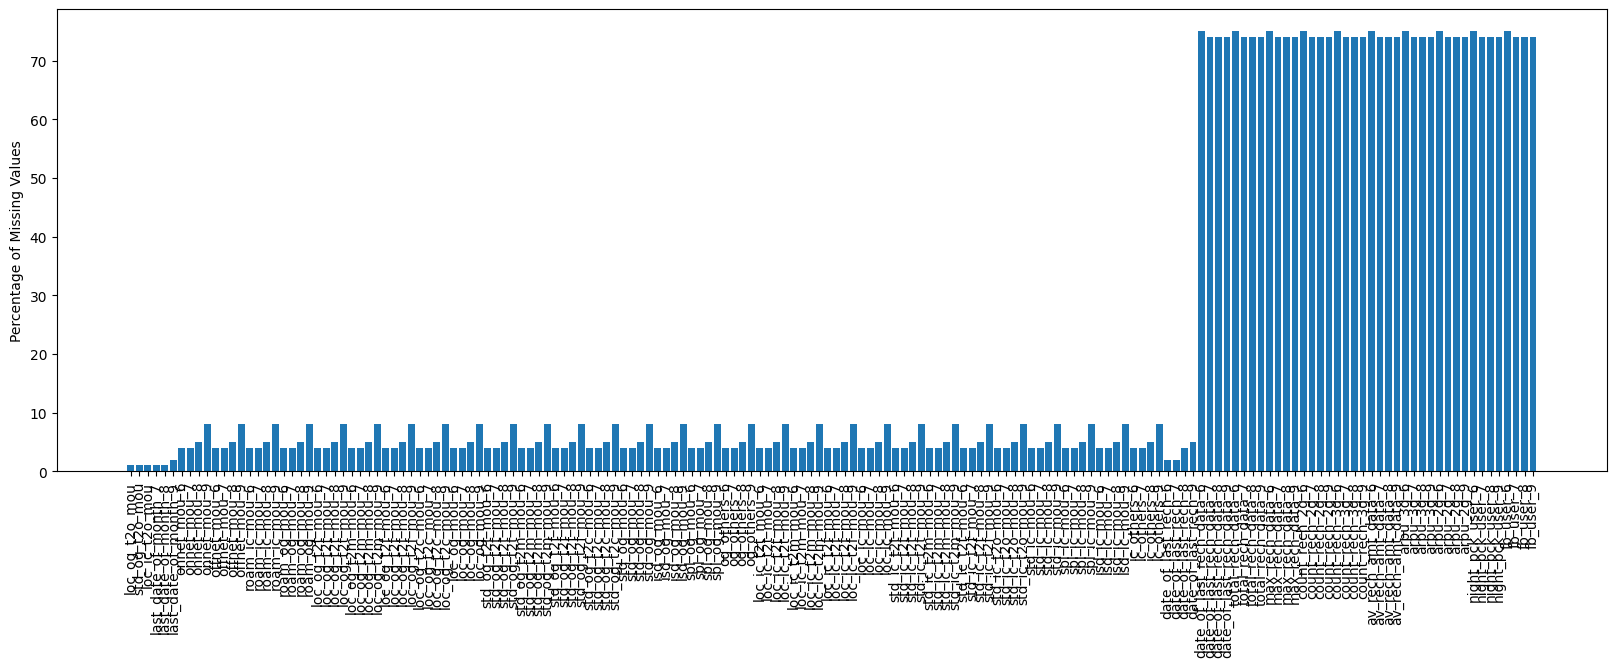

In [83]:
# Checking the percentage of Null Value for different feature

# Generate the values
values = round(df.isnull().sum() / len(df.index), 2) * 100

# Check for the features with missing values
filtered_values = values[values > 0]

# Create a bar plot with a width of 20 inches and a height of 6 inches
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(range(len(filtered_values)), filtered_values)

# Set the x-axis labels
plt.xticks(range(len(filtered_values)), filtered_values.index, rotation=90)

# Set the y-axis label
plt.ylabel('Percentage of Missing Values')

# Show the plot
plt.show()

In [84]:
# Find the features with more than 70% Null value
null_feature = df.columns[(df.isnull().sum()/len(df.index))*100>70]

print("Number of feature with more then 70% missing values: {}".format(len(null_feature)))

Number of feature with more then 70% missing values: 40


In [85]:
# Removing the columns with more than 70% null value

df = df.drop(null_feature, axis = 1)

In [86]:
# new number of instances and  features
df.shape

(99999, 186)

In [87]:
# Finding Unique values of each feature
df.nunique()


mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
loc_og_t2t_mou_7        13411
loc_og_t2t_mou_8        13336
loc_og_t2t_mou_9        12949
loc_og_t2m

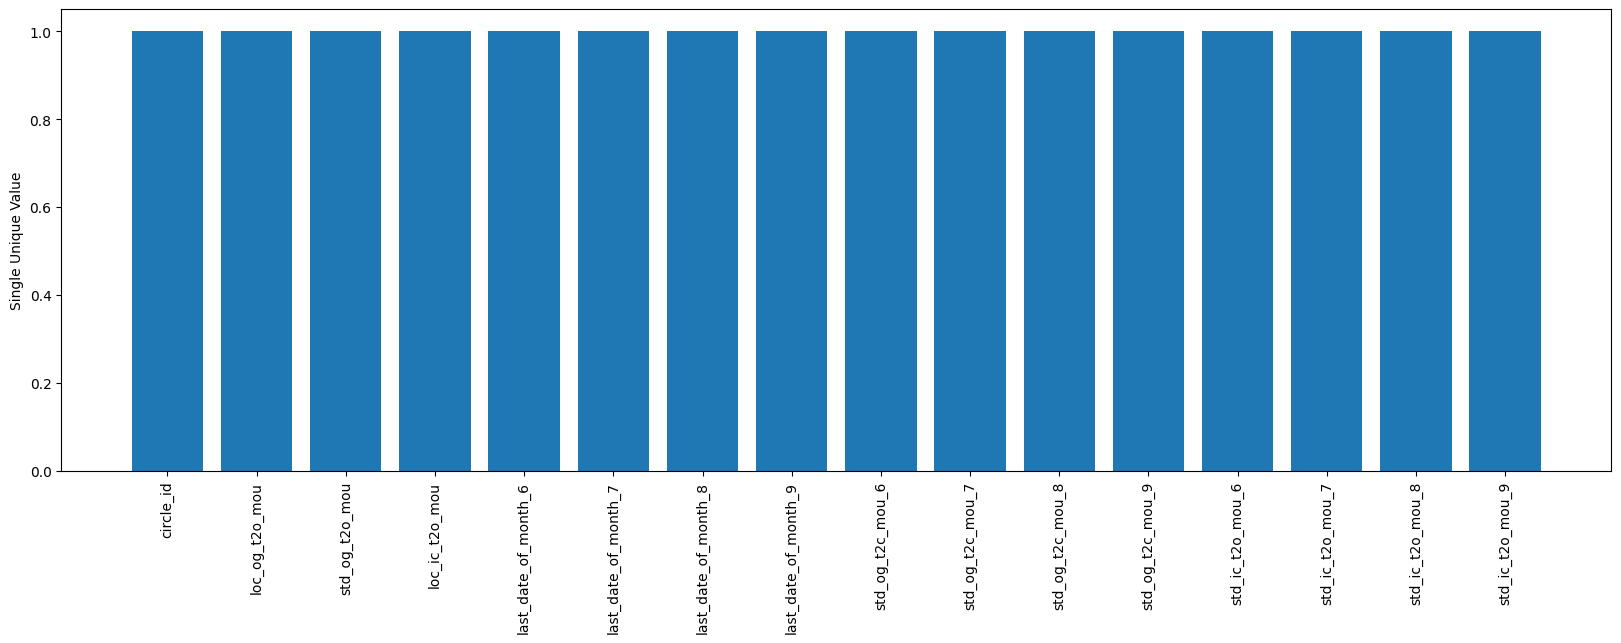

In [88]:
# Checking the percentage of Null Value for different feature

# Generate the values
values = df.nunique()

# Check for the features with missing values
filtered_values = values[values == 1]

# Create a bar plot with a width of 20 inches and a height of 6 inches
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(range(len(filtered_values)), filtered_values)

# Set the x-axis labels
plt.xticks(range(len(filtered_values)), filtered_values.index, rotation=90)

# Set the y-axis label
plt.ylabel('Single Unique Value')

# Show the plot
plt.show()

In [89]:
# Dropping the columns with only one unique value as they will not add any significant contribution

single_feature_value = df.columns[df.nunique() == 1]
df = df.drop(single_feature_value, axis =1)


In [90]:
# new number of instances and features
df.shape

(99999, 170)

In [91]:
# Filling rest of the null value with mean of each column

# select numeric columns only
df_numeric = df.select_dtypes(include=['float64', 'int64']).columns

# fill NaN values with mean of each numeric column
df[df_numeric] = df[df_numeric].fillna(df[df_numeric].mean())

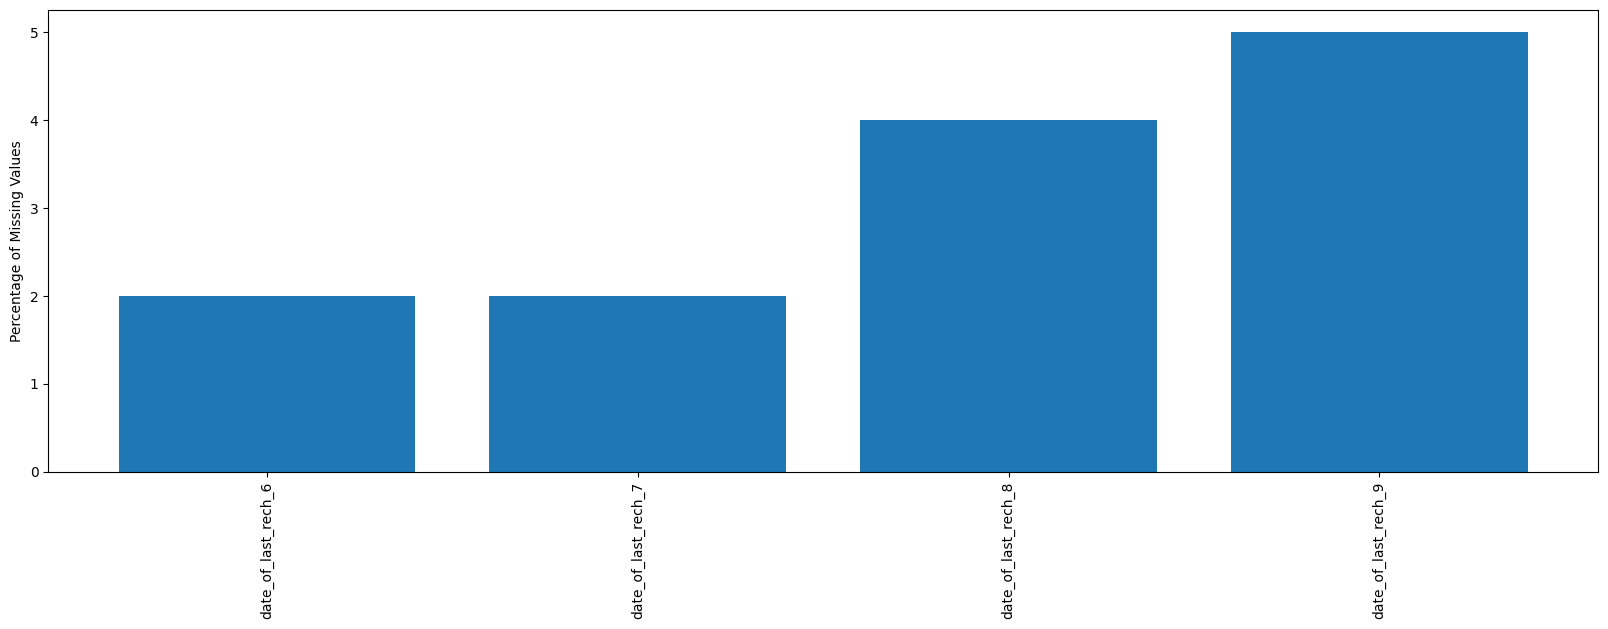

In [92]:
# Plotting the percentage of Null Value
values = round(df.isnull().sum() / len(df.index), 2) * 100

# Filter the values to only include those greater than 30
filtered_values = values[values > 0]

# Create a bar plot with a width of 20 inches and a height of 6 inches
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(range(len(filtered_values)), filtered_values)

# Set the x-axis labels
plt.xticks(range(len(filtered_values)), filtered_values.index, rotation=90)

# Set the y-axis label
plt.ylabel('Percentage of Missing Values')

# Show the plot
plt.show()

In [93]:
# Fill NaN value in date column with zero as date cannot be filled with mean value
df.fillna(0, inplace=True)


In [94]:
# Current Features with percentage of Null Value 

round(df.isnull().sum()/len(df.index),2)*100

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
arpu_9                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
onnet_mou_9            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
offnet_mou_9           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_ic_mou_9          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
roam_og_mou_9          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2t_mou_9       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2m_mou_9       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2f_mou_9       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_t2c_mou_9       0.0
l

In [95]:
# The churn is defined as the month where clients left the service and before had it. We take month 9 to decide this

df['target'] = np.where((df['total_ic_mou_9'] == 0.00) & (df['total_og_mou_9'] == 0.00) & (df['vol_2g_mb_9'] == 0.00) & (df['vol_3g_mb_9'] == 0.00), 1, 0)

df.target = df.target.astype("category")

print("Churn:")
print(round(df.target.value_counts()*100/df.shape[0], 2))

print("Since the customer churn is only 10.19%, data is unbalanced. Consequently, we need to balance our dataset")

Churn:
0    89.81
1    10.19
Name: target, dtype: float64
Since the customer churn is only 10.19%, data is unbalanced. Consequently, we need to balance our dataset


We observe with the following scatterplots that our problem is not linear


<Axes: xlabel='arpu_8', ylabel='vol_3g_mb_8'>

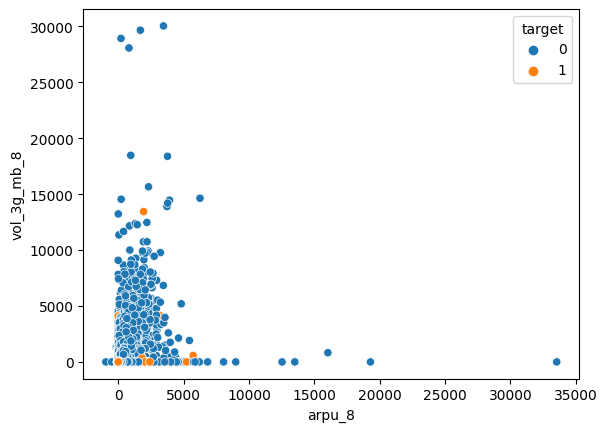

In [96]:
print("We observe with the following scatterplots that our problem is not linear")

sns.scatterplot(data=df, x='arpu_8', y='vol_3g_mb_8', hue=df.target)

<Axes: xlabel='arpu_8', ylabel='total_og_mou_8'>

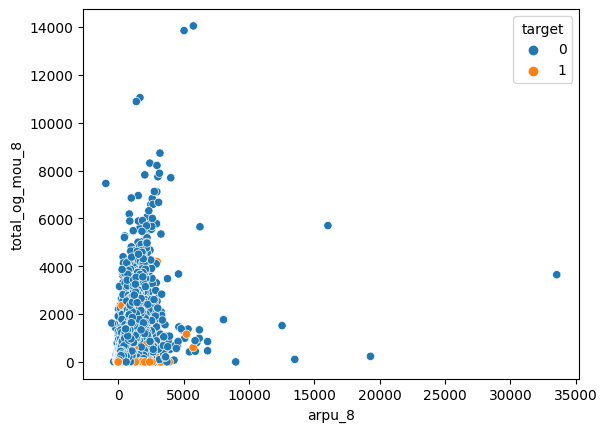

In [97]:
sns.scatterplot(data=df, x='arpu_8', y='total_og_mou_8', hue=df.target)

<Axes: xlabel='arpu_8', ylabel='total_rech_amt_8'>

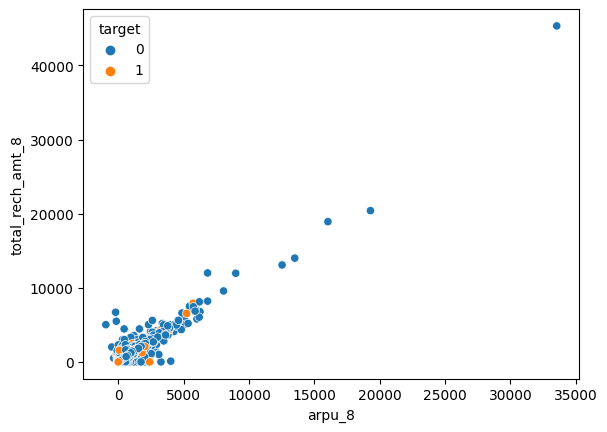

In [98]:
sns.scatterplot(data=df, x='arpu_8', y='total_rech_amt_8', hue=df.target)

In [99]:
# We explicit X and y
X = df.select_dtypes(exclude=['object'])
y = df.target

# Preview y
print(y.head())

# We proceed to make the splitting of 70:30 ratio
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
# Since the amount of samples is very high (125,730 instances), we proceed to sample
n_instances = 30000

print("Before sampling:")
print("  Dataset shape (train sample):", X.shape)
print("  Dataset shape (test sample) :", y.shape)

X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=round(n_instances * 0.7), test_size=round(n_instances * 0.3), stratify=y, random_state=42)

print("After sampling:")
print("  Dataset shape (train sample):", X_train.shape)
print("  Dataset shape (test sample) :", X_test.shape)

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: category
Categories (2, int64): [0, 1]
Before sampling:
  Dataset shape (train sample): (99999, 167)
  Dataset shape (test sample) : (99999,)
After sampling:
  Dataset shape (train sample): (21000, 167)
  Dataset shape (test sample) : (9000, 167)


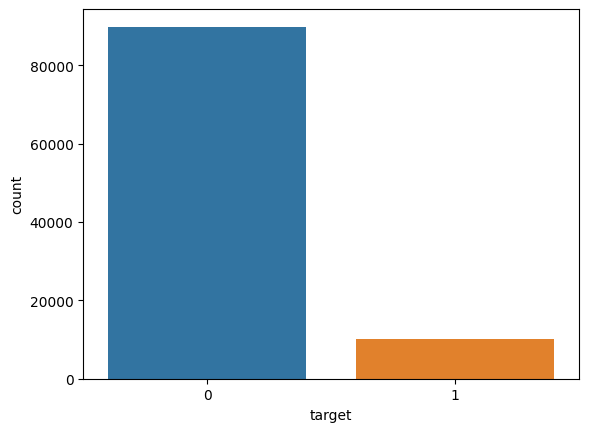

We can see that this dataset is unbalanced. Then, we proceed to balance it.


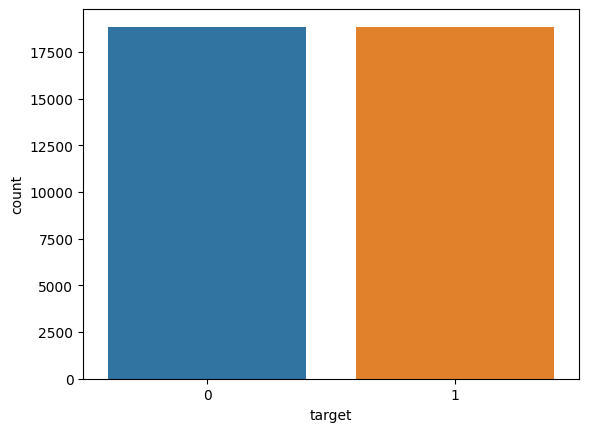

In [100]:
sns.countplot(x='target', data=df)
plt.show()
print("We can see that this dataset is unbalanced. Then, we proceed to balance it.")

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = sm.fit_resample(X_test, y_test)

sns.countplot(x=y_train_balanced)
plt.show()

In [108]:
# Standardize the d-dimensional dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_balanced)
X_test_std = sc.transform(X_test_balanced)
print("After scaling, we show the first values to demonstrate correct procedure:")
print(" Mean               (train sample):", X_train_std.mean(axis=0)[:5])
print(" Standard deviation (train sample):", X_train_std.std(axis=0)[:5])
print(" Mean               (train sample):", X_test_std.mean(axis=0)[:5])
print(" Standard deviation  (test sample):", X_test_std.std(axis=0)[:5])

After scaling, we show the first values to demonstrate correct procedure:
 Mean               (train sample): [ 1.13906857e-13 -8.83469096e-17 -1.20558683e-16 -6.63072754e-17
  1.08502814e-16]
 Standard deviation (train sample): [1. 1. 1. 1. 1.]
 Mean               (train sample): [0.002007   0.01294724 0.04219715 0.00705164 0.00195773]
 Standard deviation  (test sample): [1.0162531  1.0899985  1.15731721 0.98904248 1.04319175]



Eigenvalues 
[2.11145217e+01 1.13500819e+01 7.52607474e+00 6.86421316e+00
 5.36076910e+00 4.85833447e+00 4.52153517e+00 4.05602707e+00
 3.96479084e+00 3.82715428e+00 3.29486488e+00 3.22617972e+00
 2.98345637e+00 2.88355297e+00 2.80527984e+00 2.69566433e+00
 2.47948869e+00 2.28300472e+00 2.19903762e+00 2.17190431e+00
 2.07521291e+00 2.02627982e+00 1.94039478e+00 1.89901424e+00
 1.83125494e+00 1.67980924e+00 1.51698934e+00 1.45524283e+00
 1.41167473e+00 1.39952939e+00 1.34868973e+00 1.27955871e+00
 1.22381619e+00 1.16001969e+00 1.12756907e+00 1.10304074e+00
 1.08713462e+00 1.04157267e+00 1.03007226e+00 1.00288115e+00
 9.82767425e-01 9.55798835e-01 9.24611045e-01 9.12999120e-01
 9.01769602e-01 8.86184753e-01 8.66434130e-01 8.30064093e-01
 7.53786397e-01 8.05832211e-01 7.72256302e-01 7.92179404e-01
 7.21124956e-01 7.27880430e-01 7.05586004e-01 6.93382101e-01
 6.84968365e-01 6.43223572e-01 6.57359082e-01 6.38379351e-01
 6.32834600e-01 6.17570846e-01 5.86996030e-01 5.93094523e-01
 5.6230699

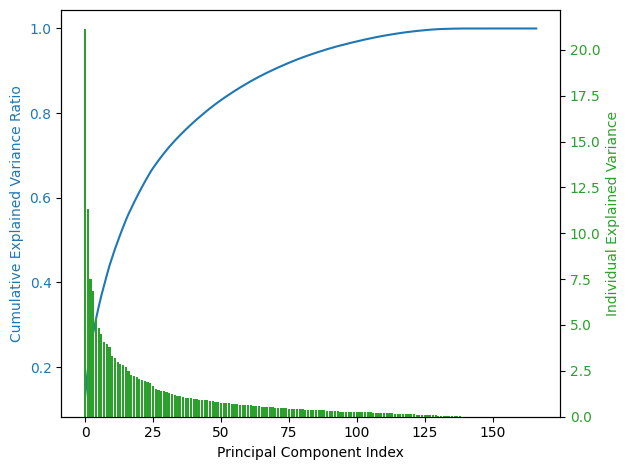

In [102]:
# Covariance matrix and eigenvectors and values
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

#PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio and individual explained variance
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
individual_var = pca.explained_variance_

# Plot cumulative and individual explained variance vs. principal component index
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Principal Component Index')
ax1.set_ylabel('Cumulative Explained Variance Ratio', color=color)
ax1.plot(cumulative_var_ratio, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Individual Explained Variance', color=color)  # we already handled the x-label with ax1
ax2.bar(range(len(individual_var)), individual_var, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [103]:
# We take the features below aprox 85% (the first 50) of cumulative explained variance ratio
first_50_pc = pca.components_[:50]
print(first_50_pc.shape)

# Get feature names
feature_names = df.columns.tolist()

# Print names of features associated with first 50 principal components
for i, pc in enumerate(first_50_pc):
    top_feature_idx = pc.argsort()[::-1][0]
    top_feature_name = feature_names[top_feature_idx]
    print(f"Principal Component {i+1}: {top_feature_name}")

(50, 167)
Principal Component 1: arpu_8
Principal Component 2: loc_ic_mou_8
Principal Component 3: vol_2g_mb_8
Principal Component 4: std_ic_mou_8
Principal Component 5: loc_og_t2f_mou_7
Principal Component 6: onnet_mou_6
Principal Component 7: onnet_mou_9
Principal Component 8: og_others_8
Principal Component 9: monthly_2g_7
Principal Component 10: roam_ic_mou_8
Principal Component 11: spl_og_mou_8
Principal Component 12: isd_ic_mou_8
Principal Component 13: vol_3g_mb_7
Principal Component 14: loc_ic_t2t_mou_7
Principal Component 15: std_ic_t2f_mou_8
Principal Component 16: isd_og_mou_8
Principal Component 17: isd_og_mou_8
Principal Component 18: std_ic_t2t_mou_9
Principal Component 19: std_ic_t2t_mou_7
Principal Component 20: std_ic_t2f_mou_7
Principal Component 21: monthly_3g_7
Principal Component 22: std_og_t2f_mou_9
Principal Component 23: ic_others_7
Principal Component 24: total_rech_num_9
Principal Component 25: roam_ic_mou_7
Principal Component 26: loc_og_t2f_mou_9
Principal C

In [104]:
# We take just the 50 first components
pca50 = PCA(n_components = 50, random_state=100)
X_train_pca50 = pca50.fit_transform(X_train_std)
X_test_pca50 = pca50.transform(X_test_std)
print('X_train_pca50 shape: ',X_train_pca50.shape)
print('X_test_pca50 shape',X_test_pca50.shape)

X_train_pca50 shape:  (37720, 50)
X_test_pca50 shape (16166, 50)


In [105]:
# We apply Perceptron classification model to compare general accuracy with and without PCA

ppn1 = Perceptron(eta0=0.1, random_state=1)
ppn1.fit(X_train, y_train)
y_pred1 = ppn1.predict(X_test)
ppn1_accuracy = sum(y_test==y_pred1)/y_test.shape[0]
print("Perceptron accuracy (no pca50) = ", round(ppn1_accuracy,4))

ppn2 = Perceptron(eta0=0.1, random_state=1)
ppn2.fit(X_train_pca50, y_train)
y_pred2 = ppn2.predict(X_test_pca50)
ppn2_accuracy = sum(y_test==y_pred2)/y_test.shape[0]
print("Perceptron accuracy (with pca50) ", round(ppn2_accuracy,4))

Perceptron accuracy (no pca50) =  0.8981


ValueError: Found input variables with inconsistent numbers of samples: [37720, 21000]

In [ ]:
# We apply Perceptron classification model to compare general accuracy with and without PCA
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(C=1, max_iter=500)
lr1.fit(X_train, y_train)
y_pred1 = lr1.predict(X_test)
lr1_accuracy = sum(y_test==y_pred1)/y_test.shape[0]
print("Logistic Regression accuracy (no pca50) = ", round(lr1_accuracy,4))

lr2 = LogisticRegression(C=1, max_iter=500)
lr2.fit(X_train_pca50, y_train)
y_pred2 = lr2.predict(X_test_pca50)
lr2_accuracy = sum(y_test==y_pred2)/y_test.shape[0]
print("Logistic Regression accuracy (with pca50) ", round(lr2_accuracy,4))


Logistic Regression accuracy (no pca50) =  0.8981
Logistic Regression accuracy (with pca50)  0.9995
